In [1]:
# Basic Python libraries
import numpy as np
import pandas as pd

In [2]:
#Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#To plot the graph embedded in the notebook
%matplotlib inline

In [4]:
#imports from sklearn library

from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error

In [5]:
#loading the dataset direclty from sklearn
boston = datasets.load_boston()

In [7]:
type(boston)

sklearn.utils.Bunch

In [8]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [9]:
boston.data.shape

(506, 13)

In [10]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [12]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [32]:
df = pd.DataFrame(boston.data,columns = boston.feature_names)
df_copy = df.copy()
df['PRICE'] = boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


*Even though the description mentioned " no missing attributes value", we can still do simple checks.*

In [33]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [18]:
# Understand the data
print(df.describe())

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.105710    8.70725

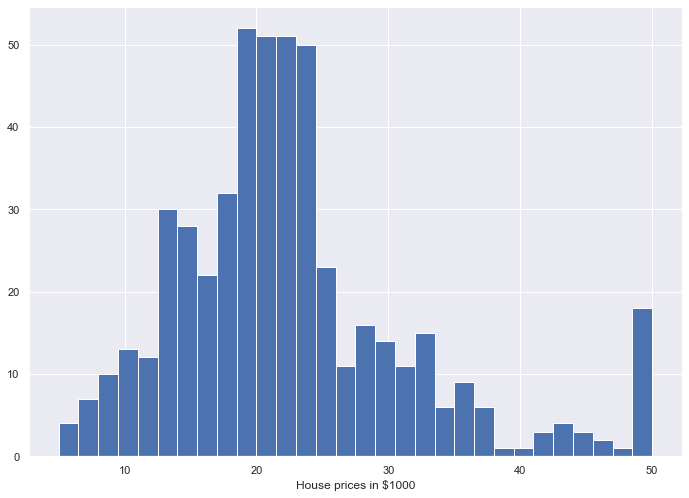

In [23]:
#plt.figure(figsize=(11.7,8.27))
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.hist(df['PRICE'], bins=30)
plt.xlabel("House prices in $1000")
plt.show()

The values of PRICE are distributed normally with few outliers. Most of the house are around 20–24 range (in $1000 scale)

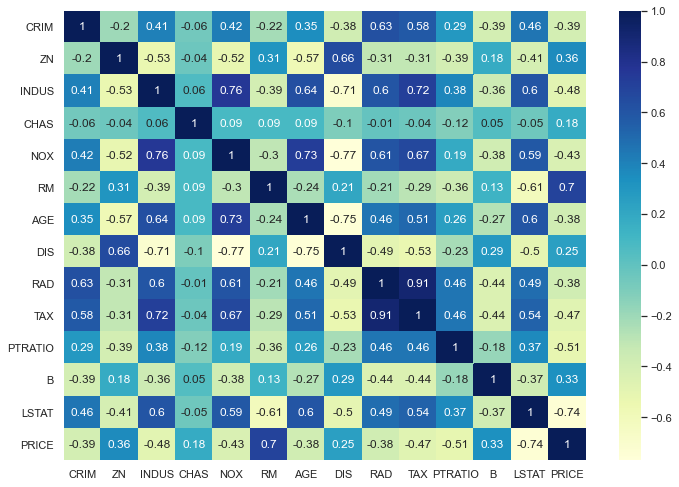

In [26]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

correlation_matrix = df.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True,cmap="YlGnBu")
plt.show()

 1. RM has a strong positive correlation with PRICE (0.7) 
 2. LSTAT has a high negative correlation with PRICE (-0.74)
 3. Multicolinearity:
    1. feature RAD and TAX have a correlation of 0.9, strongly correlated
    2. feature DIS and AGE also have good correlation of value -0.75

Text(0, 0.5, '"House prices in $1000"')

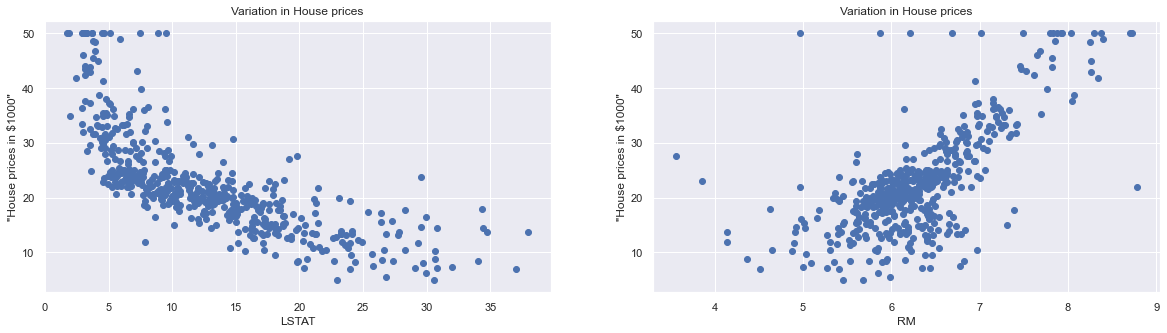

In [29]:
sns.set(rc={'figure.figsize':(20,5)})

plt.subplot(1, 2 , 1)

x = df['LSTAT']
y = df['PRICE']
plt.scatter(x, y, marker='o')
plt.title("Variation in House prices")
plt.xlabel('LSTAT')
plt.ylabel('"House prices in $1000"')

plt.subplot(1, 2 , 2)

x = df['RM']
plt.scatter(x, y, marker='o')
plt.title("Variation in House prices")
plt.xlabel('RM')
plt.ylabel('"House prices in $1000"')

1. The prices increase with RM increases linearly. There are few outliers. The data seems to be capped at 50.
2. The prices decrease with LSTAT increases. Though it doesn’t look to be following exactly a linear line.

In [34]:
 for k, v in df_copy.items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        irq = q3 - q1
        v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(df_copy)[0]
        print("Column %s outliers = %.2f%%" % (k, perc))

Column CRIM outliers = 13.04%
Column ZN outliers = 13.44%
Column INDUS outliers = 0.00%
Column CHAS outliers = 100.00%
Column NOX outliers = 0.00%
Column RM outliers = 5.93%
Column AGE outliers = 0.00%
Column DIS outliers = 0.99%
Column RAD outliers = 0.00%
Column TAX outliers = 0.00%
Column PTRATIO outliers = 2.96%
Column B outliers = 15.22%
Column LSTAT outliers = 1.38%


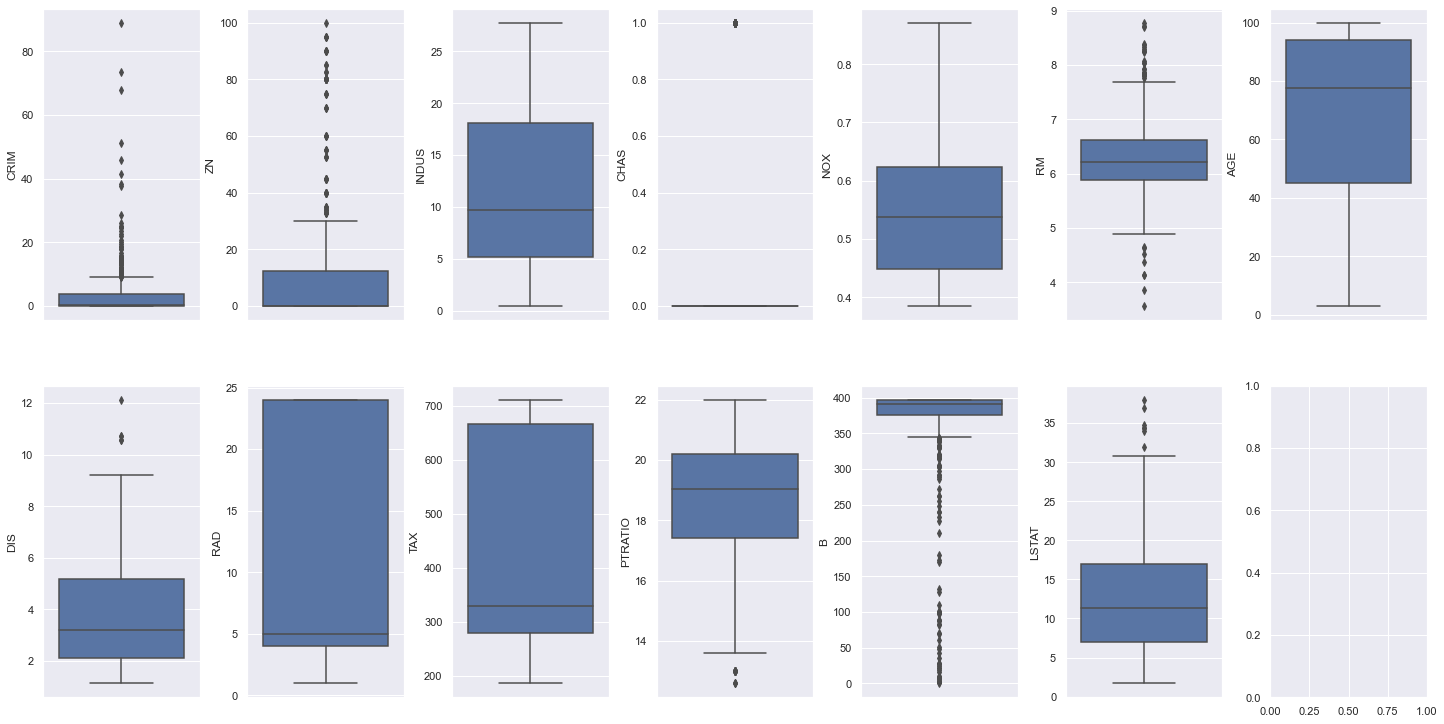

In [35]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df_copy.items():
    sns.boxplot(y=k, data=df_copy, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

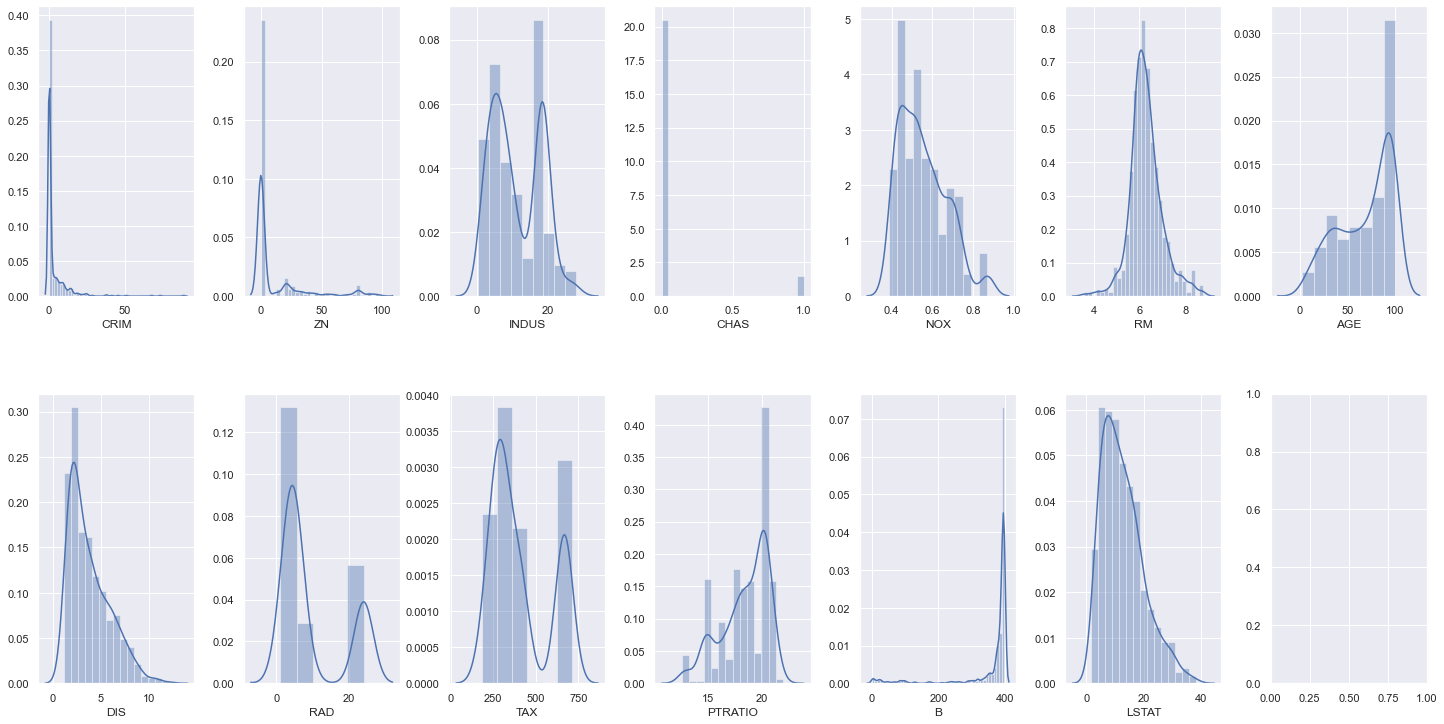

In [37]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df_copy.items():
    sns.distplot(v, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

1.Columns CRIM, ZN, B has highly skewed distributions. <br>
2.MEDV looks to have a normal distribution <br>
3.Other colums seem to have norma or bimodel ditribution of data except CHAS (which is a discrete variable).<br>

In [56]:
df = df.replace(np.inf, np.nan).replace(-np.inf, np.nan).dropna()
df.shape

(506, 14)

In [66]:
# Spliting target variable and independent variables
X = df.drop(['PRICE'], axis = 1)
y = df['PRICE']


In [68]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 25)

In [69]:
print("Shape of X_train: ",X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of Y_train: ",y_train.shape)
print("Shape of Y_test",y_test.shape)

Shape of X_train:  (354, 13)
Shape of X_test:  (152, 13)
Shape of Y_train:  (354,)
Shape of Y_test (152,)


In [70]:
from sklearn.linear_model import LinearRegression

# Create a Linear regressor
lm = LinearRegression()

# Train the model using the training sets 
lm.fit(X_train, y_train)

LinearRegression()

In [71]:
lm.intercept_

38.104225931847836

In [72]:
#Converting the coefficient values to a dataframe
coeffcients = pd.DataFrame([df.columns,lm.coef_]).T
coeffcients = coeffcients.rename(columns={0: 'Attribute', 1: 'Coefficients'})
coeffcients

,Attribute,Coefficients
0,CRIM,-0.115254
1,ZN,0.0505164
2,INDUS,0.0273671
3,CHAS,0.730471
4,NOX,-18.9833
5,RM,4.03133
6,AGE,-0.00482897
7,DIS,-1.55
8,RAD,0.36747
9,TAX,-0.0166701


In [74]:
y_pred = lm.predict(X_train)

In [54]:
l_regression = LinearRegression()
kf = KFold(n_splits=10)
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(X_train)
scores = cross_val_score(l_regression, x_scaled, Y_train, cv=kf, scoring='neg_mean_squared_error')
print("MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

MSE: -25.44 (+/- 10.56)


In [76]:
from sklearn import metrics

# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.7435787589010061
Adjusted R^2: 0.7337744173295739
MAE: 3.3670963135177154
MSE: 22.64350774919138
RMSE: 4.758519491311492


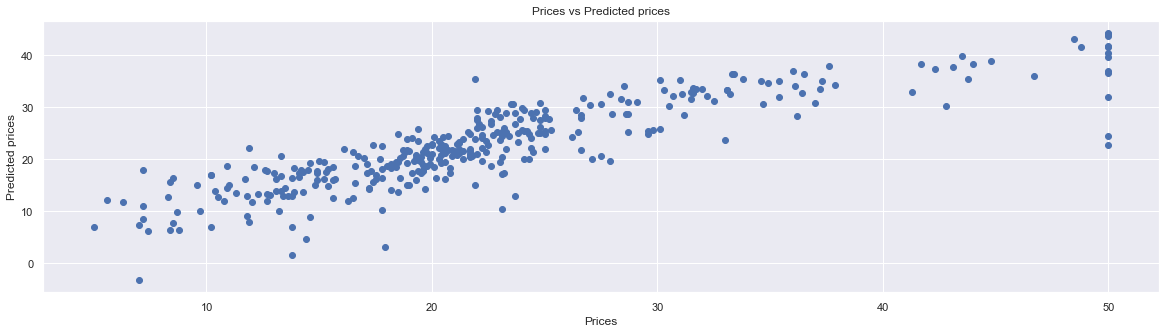

In [78]:
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

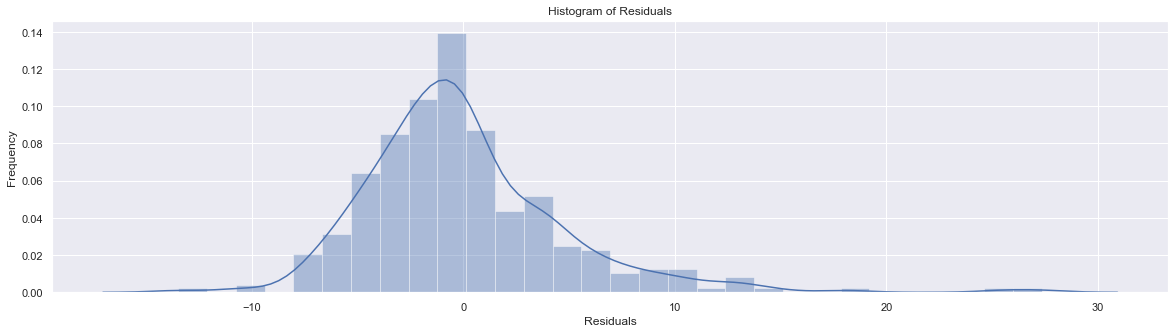

In [79]:
sns.distplot(y_train-y_pred)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

1. normally distributed, so satisfied linear assumption

In [80]:
# Predicting Test data with the model
y_test_pred = lm.predict(X_test)

In [81]:
acc_linreg = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_linreg)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: 0.7133593313710344
Adjusted R^2: 0.6863569495436681
MAE: 3.1175694194800943
MSE: 21.59720903501855
RMSE: 4.647279745724218


1. the model is not overfitting, since training model result and test model result evaluation are almost matching